# Logistic Regression from Scratch over Breast Cancer Data(Bi-Class Classification)
Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). It is a Discriminate Learning Algorithm which means that it try to find posterior probability over classes directly without the envolvement of likelihood probabilities.<br>

In statistics, the logistic model is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead, True/False or healthy/sick. <br>

This can be extended to Classify several classes of events such as determining whether an image contains a cat, dog, lion, etc.<br>

This code contains only about how we can fit a logistic model over user given dataset and also to get a good output result out of it. The code written keeping vision of object oriented programing which means that the code is fully moduler so that to keep in mind about the use of the functions in other programs also.
<br>
### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output

### Calling Data
Data is call for work. The Columns are selected here is according to the BREAST CANCER DATASET from WINCONSIN Hospital Easily find on Kaggle(www.kaggle.com).

In [2]:
data= pd.read_csv("Breast_Cancer_Data.csv")
columns=data.columns

Removing unnecessary columns from the dataset so that you won't face any trouble regarding the dataset. I use Breast Cancer Dataset to train model and predict whether the person is having cancer or not.

In [3]:
data.drop([data.columns[0],data.columns[32]],axis=1,inplace=True)

Separating Label Column

In [4]:
#separating class column
class_label=data.iloc[:,0:1]
class_label.replace(to_replace=['B','M'],value=(0,1),inplace=True)
class_train=np.array(class_label.iloc[:int(0.7*data.shape[0])])
class_test=np.array(class_label.iloc[int(0.7*data.shape[0]):])

/home/daku/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


### Normalising Functions
The normalisation is also know as standardisation. Standardization is a process for making a dataset fit for the training of the model. In this prosess we make a dataset whose value lies between zero mean and one standard deviation. The Data Comming out from this process is smooth for the curves and fitting a model.

In [5]:
def normalise(data_to_normal,data_refer):
    mean = data_refer.mean()
    std = data_refer.std()
    data = (data_to_normal-mean)/std
    data = np.array(data)
    return data

### Sigmoid Function
Defining the Sigmoid Function. Sigmoid function is use in the ml to get the probability value (i.e. between 0 to 1) for any feature. The function basically has the formula which make the value equal to probable value of the feature between 0 to 1.<br>
 
### Formula : 
$$s_ \theta (x) =  \frac{\mathrm{1} }{\mathrm{1} + e^-{( \theta^Tx + \theta 0)}}$$

In [6]:
def sigmoid(theta0,theta,train_data):
    return 1/(1+np.exp(-(np.matmul(train_data,theta)+theta0)))

### Negative Log Loss Function
Defining Function for Negative Log Loss calculation.In Convex Optimization we find the global minima to train the model so it get less error while prediction for the testing and training data. This error is called  as loss. We introduce log and a negative sign in case to smoothing of and inverting the parabola to find the global minima.<br>
##### Here, Logrithm is use to smoothing out the curve so that it don't stucked in any local minima. 
##### Here, Negative sign is introduce to invert the parabola of the function.
### Formula : 
$$l_ \theta (C) = - \frac{C * H[\theta_ \mathrm{0},\theta_ \mathrm{1},...,\theta_ n] + (\mathrm{1} - C) * H[\theta_ \mathrm{0},\theta_ \mathrm{1},...,\theta_ n]}{Training Length}$$

In [7]:
def Neg_loss(theta0,theta):
    h=sigmoid(theta0,theta,train_data)
    return -(1/training_len)*(np.matmul((class_train.T),np.log(h))+np.matmul(((1-class_train).T),np.log(1-h)))

### Gradient Descent
The Fit function is to fit the learning curve and reduce the loss of the model. The algorithm use here is the Stocastic Gradient Descent(SGD). The algorithm is containing the learning rate,epsilon for the stoping of under going algorithm to find global minima.

In [8]:
def fit(training_data,training_label,epsilon,alpha,no_of_columns):
    theta_init = np.random.randn(no_of_columns,1)
    theta0_init = np.random.randn(1,1)
    neg_log_loss_history = []
    i=0
    training_len = training_data.shape[0]
    
    while True:
        H=sigmoid(theta0_init,theta_init,train_data)

        H=H.reshape(training_len,1)

        theta0_final=theta0_init-(alpha*(1/training_len)*np.sum(H-training_label))

        theta_final=theta_init-(alpha*(1/training_len)*(np.matmul((H-training_label).T,training_data)).T)

        if abs(Neg_loss(theta0_init,theta_init)-Neg_loss(theta0_final,theta_final))<epsilon:
            break

        theta0_init=theta0_final

        theta_init=theta_final

        neg_log_loss_history.append(Neg_loss(theta0_init,theta_init))

        #Following line is for printing Verbose on Loss and Iteration
        print('Iteration=',i,'\nLog Loss Value=',neg_log_loss_history[i])
        clear_output(wait=True)
        
        i+=1
    return theta0_final,theta_final

### Testing Function
Defining Testing Function which returns True positive, False positives and accuracy over provided data. The function is also tell about the recall, precision and accuracy of the testing while predicting the result. This helps in knowing how robust our model is working over the data to train itself.

In [9]:
def testing_and_ROC_values(testing_data,testing_label,theta0_final,theta_final,V=True):
    
    H_test=1/(1+np.exp(-(theta0_final+np.matmul(testing_data,theta_final))))
    
    bool_mask=H_test>0.5
    
    bool_mask=np.uint8(bool_mask)
    
    x=np.count_nonzero(np.equal(bool_mask,testing_label))
    
    acc=(x*100)/testing_label.shape[0]
    
    tn=0
    tp=0
    fn=0
    fp=0
    
    for i in range(0,testing_label.size):
        if(testing_label[i]==1 and bool_mask[i]==1):
            tn+=1
        elif(testing_label[i]==1 and bool_mask[i]==0):
            fp+=1
        elif(testing_label[i]==0 and bool_mask[i]==1):
            fn+=1
        elif(testing_label[i]==0 and bool_mask[i]==0):
            tp+=1     
            
    if V==True:
        print("Recall =",100*tp/(tp+fn))
        print("Precision =",100*tp/(tp+fp))
        print("Accuracy =",acc)
        
    tpr=tp/(tp+fn)
    fpr=fp/(fp+tn)
    
    return tpr,fpr,acc

### Plot ROC Curve Function
Preparing to plot ROC curve. The function plot the ROC Curve from the list containing the value of true positive and false positive rate. A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The ROC curve is created by plotting the true positive rate against the false positive rate at various threshold settings.

In [10]:
def plot_ROC_curve(training_data,training_label,testing_data,theta0,theta,V,no_of_rounds):
    i=0
    ROCx=[1,0]
    ROCy=[1,0]
    training_len = training_data.shape[0]
    testing_len = testing_data.shape[0]

    while i<no_of_rounds:
        index=np.array(np.random.choice(list(range(training_len)),testing_len),dtype=int)

        index.sort()

        new_test=training_data[list(index)]    

        new_class=training_label[list(index)]

        y,x,_=testing_and_ROC_values(new_test,new_class,theta0,theta,V=V)

        ROCx.append(x)
        ROCy.append(y)
        i+=1
        
    ROCx.sort()
    ROCy.sort()

    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot(ROCx,ROCy)

###  Main Function

In [11]:
#Splitting Training and Testing Data
training_len=int(0.7*data.shape[0])
train_data=data.iloc[:training_len]
test_data=data.iloc[training_len:]
test_data.drop(labels=[columns[1]],axis=1,inplace=True)
train_data.drop(labels=[columns[1]],axis=1,inplace=True)

#normalising the data using normalise function.
train_data = normalise(train_data,train_data)
test_data = normalise(test_data,train_data)

/home/daku/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Fitting the model over Training Data

In [15]:
theta0,theta = fit(training_data=train_data,training_label=class_train,epsilon=0.00001,alpha=0.0001,no_of_columns=30)

Iteration= 20882 
Log Loss Value= [[0.44346268]]


#### Testing our Model on the Training Data

In [16]:
y,x,_=testing_and_ROC_values(train_data,class_train,theta0,theta)

Recall = 88.44444444444444
Precision = 85.77586206896552
Accuracy = 85.17587939698493


#### Testing our Model on the Testing Data

In [17]:
y,x,_=testing_and_ROC_values(test_data,class_test,theta0,theta)

Recall = 100.0
Precision = 77.19298245614036
Accuracy = 77.19298245614036


/home/daku/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


#### Plotting ROC Curve for Training Data

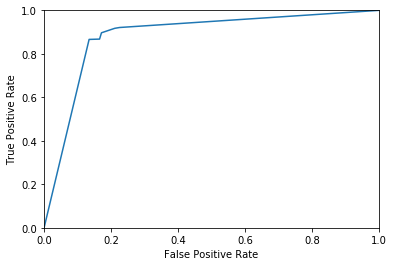

In [18]:
plot_ROC_curve(training_data=train_data,training_label=class_train,testing_data=train_data,theta0=theta0,theta=theta,V=False,no_of_rounds=5)

#### Plotting ROC Curve Testing Data

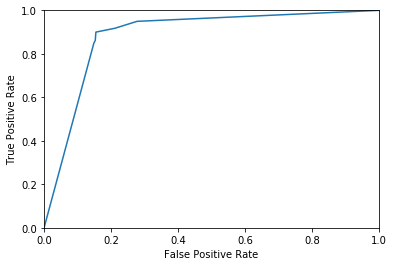

In [19]:
plot_ROC_curve(training_data=train_data,training_label=class_train,testing_data=test_data,theta0=theta0,theta=theta,V=False,no_of_rounds=5)